<font size=6>**TLDR**</font><br>
<font size=4>In this assignment, we successfully predicted the survival of Titanic passengers using machine learning classification techniques. We started by loading and inspecting the dataset, identifying and handling missing values, and converting categorical variables to numerical formats. We enhanced the dataset with new features such as HadFamily, FarePclass, SexPclass, and Sex*Fare, while dropping irrelevant features like Name, Ticket, Cabin, and PassengerID. After extensive model training and testing, we found that the best model excluded the HadFamily feature, resulting in the highest accuracy and a submission score of 0.797. We trained and tested several classification models, optimizing the best performer through hyperparameter tuning. The final model was validated using cross-validation techniques and applied to make predictions on the test dataset. This comprehensive approach allowed us to effectively utilize the data and machine learning tools to achieve accurate predictions, fulfilling the assignment's objectives.</font>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import math
import numpy as np
import matplotlib.pyplot as plt

# import sklearn and load boston dataset
import sklearn
from sklearn import datasets

import pandas as pd

# imort seaborn and draw regression joint plot
import seaborn as sns

#import model_selection and split to train and test
from sklearn import model_selection

# import linear_model and train with NE
from sklearn import linear_model

# import metrics and calculate MSE and RMSE
from sklearn import metrics

# import pipeline and preprocessing from sklearn, standardize the features
# and run SGD on the data
from sklearn import pipeline, preprocessing
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/photoes/Position - Titanic.png
/kaggle/input/photoes/Best Score - Titanic.png


In [2]:
df_train = pd.read_csv("/kaggle/input/titanic/train.csv")
df_test = pd.read_csv("/kaggle/input/titanic/test.csv")
test_ids = df_test["PassengerId"]

print("Our data frame is: ")
df_train

Our data frame is: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train_copy = df_train.copy()

# Features Description
* Survival (0 = No, 1 - Yes)
* Pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* Sex (male/female)
* Age (in years)
* SibSp - # of siblings / spouses aboard the Titanic
* Parch - # of parents / children aboard the Titanic
* Ticket number
* Fare
* Cabin number
* Embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [4]:
train_copy.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
total_null_values = train_copy.isnull().sum()
null_percentage = total_null_values / len(train_copy) * 100
print(null_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


# Describe Dropping columns
<font size="4">We can see there are columns that will not help us, so we will drop them from our data.</font>

<font size="4">For example:
* Ticket and PassengerId will not help us to predict who survived.
* There are a lot of missing cells inside Cabin's column (77% of missing cells) so this data doesn't represent us anything.</font>

In [6]:
train_copy.drop(columns=['Ticket', 'Cabin', 'PassengerId'], inplace=True)
df_test.drop(columns=['Ticket', 'Cabin', 'PassengerId'], inplace=True)

<font size = '5'>Adding the "Title" Feature to Improve Survivor Prediction<br></font>
<font size='4'>The "Title" feature can capture important social and familial information. Titles such as Mr., Mrs., Miss, Master,captin, etc., often contain information about an individual's gender, age group, and social status, which can be crucial factors in survival prediction..</font>

In [7]:
for dataset in train_copy, df_test:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_copy['Title'], train_copy['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [8]:
for dataset in train_copy, df_test:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_copy[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [9]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in train_copy, df_test:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_copy.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


<font size = '5'>Dropping the "Name" Feature<br></font>
<font size = '4'>After extracting the "Title" feature from the "Name" column, we will drop the "Name" feature from our dataset. The "Title" feature captures the essential information that can be derived from the "Name" feature, such as gender, age group, and social status, which are more relevant for predicting survival. Including the "Name" feature in the model would not provide additional predictive power and could introduce unnecessary noise. By focusing on the "Title" feature, we ensure that our model uses the most pertinent information without being affected by irrelevant details from the "Name" feature.</font>

In [10]:
train_copy = train_copy.drop(['Name'], axis=1)
df_test = df_test.drop(['Name'], axis=1)

In [11]:
train_copy.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
Title         int64
dtype: object

<font size = '5'>Checking for Empty Cells<br></font>
<font size = '4'>Before proceeding with feature engineering and model training, it is crucial to ensure data quality by checking for any empty cells in the dataset. Missing values can significantly impact the performance of our machine learning model. Therefore, we will start by examining the dataset for any missing values and handle them appropriately. This step helps us identify and address potential data issues early in the process, ensuring that our model is built on a solid and complete dataset.<font>

In [12]:
train_copy.isna().any()

Survived    False
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Fare        False
Embarked     True
Title       False
dtype: bool

<font size="5">**Handling the missing values**<br></font>
<font size = '4'>Upon checking for empty cells, we have found that the "Age" feature contains a few missing values. To address this, we will fill the missing cells with the average age. By imputing the missing values with the mean, we ensure that the "Age" feature remains useful in the model without introducing significant bias. This approach maintains the integrity of the dataset and allows us to proceed with a complete and consistent set of data.</font>

In [13]:
def fill_na_avg(df, feature):
    avg = df[feature].mean()
    df[feature] = df[feature].fillna(value=avg)
    
    
fill_na_avg(train_copy, 'Age')

<font size="4">"Embarked" feature contains a few missing values.we will fill the missing cells with random "Embarked" values. This approach ensures that the missing values are replaced with plausible values without introducing bias towards any specific category. By imputing the missing values in this manner, we maintain the completeness of the dataset and enable the model to utilize the "Embarked" feature effectively in the prediction process..</font>


In [14]:
missing_embarked = train_copy['Embarked'].isnull()
num_missing = missing_embarked.sum()
random_embarked = train_copy['Embarked'].dropna().sample(n=num_missing, replace=True, random_state=42)
train_copy.loc[missing_embarked, 'Embarked'] = random_embarked.values

<font size = '4' >After handling missing values in the "Age" and "Embarked" features, we will perform a final check to ensure that all missing values have been properly addressed. This step is crucial for verifying the completeness of our dataset before proceeding with feature engineering and model training. By confirming that no missing values remain, we can proceed with confidence, knowing that our dataset is complete and ready for further analysis.</br>

In [15]:
train_copy.isna().any()

Survived    False
Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
Title       False
dtype: bool

<font size='5'>**Converting Non-Numeric Data to Numeric**<br></font>
<font size='4'>To ensure compatibility, we need to convert non-numeric data into numeric format. This process, known as data encoding, involves transforming categorical variables into numerical representations.<br></font>
<br>
<font size = '4'>We will convert the "Sex" feature into a numeric format.<br>
We will assign the value 0 to represent male and the value 1 to represent female. This encoding ensures that the "Sex" feature is represented in a binary format, which is compatible with many machine learning models.</font>

In [16]:
for dataset in train_copy, df_test:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


<font size = '4'>We will convert the "Embarked" feature into a numeric format.<br>
We will assign the value 0 to represent embarked 'C', 1 to represent embarked 'Q' and 2 to represent embarked 'S'. </font>

In [17]:
for dataset in train_copy, df_test:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 0, 'Q': 1, 'S': 2} ).astype(int)

train_copy.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,2,1
1,1,1,1,38.0,1,0,71.2833,0,3
2,1,3,1,26.0,0,0,7.9250,2,2
3,1,1,1,35.0,1,0,53.1000,2,3
4,0,3,0,35.0,0,0,8.0500,2,1


<font size='5'>With our database now containing exclusively numeric values, we're prepared to proceed with analyzing the heatmap:</font>

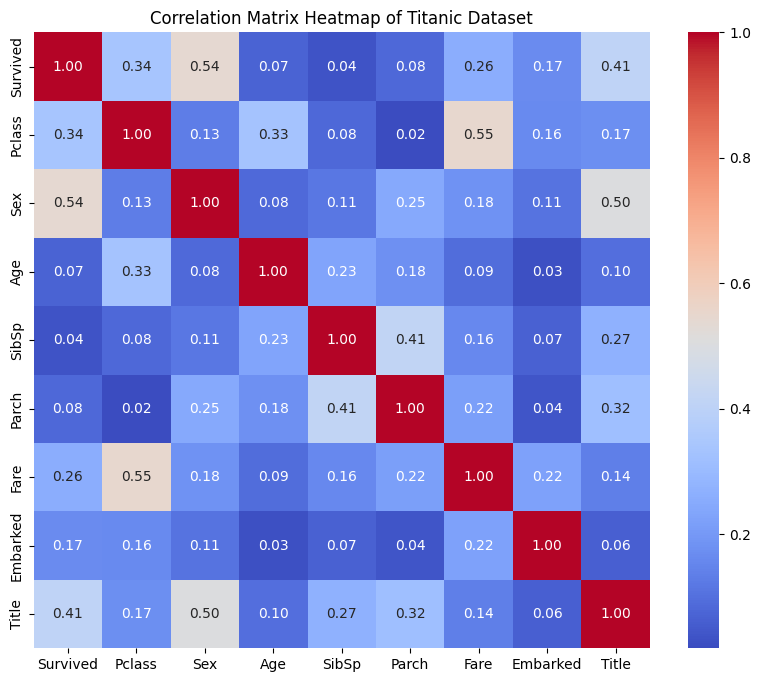

In [18]:
numerical_train_copy = train_copy.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns only
correlation_matrix = np.abs(numerical_train_copy.corr())

# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap of Titanic Dataset')
plt.show()

<font size='4'>The correlation analysis reveals that factors such as gender, class, fare, and title had a more pronounced impact on survival odds compared to age, port of embarkation, or family size. Particularly noteworthy is the strong correlation observed with the 'Sex' feature, indicating its pivotal role as the most influential predictor among the variables examined. This insight can serve as a valuable guide for directing future analyses or predictive modeling endeavors, emphasizing the importance of focusing on these key factors to enhance accuracy and effectiveness. </font>

<font size='5'>**Improving Efficiency with New Features**<br></font>
<font size='4'>Based on insights from the heatmap, we can enhance our dataset by introducing new features that combine existing ones, improving efficiency and predictive power, souch as:<br><br>
1."HadFamily": This feature will replace "SibSp" and "Parch" by capturing the presence of family members in a single column.<br>
2."Fare X Pclass": This feature will represent "Fare" and "Pclass" by capturing the interaction between fare and passenger class.<br>
3."Sex X Pclass": This feature will represent "Sex" and "Pclass" by capturing the interaction between gender and passenger class.<br>
4."Sex X Fare": This feature will represent "Sex" and "Fare" by capturing the interaction between gender and fare.<br>
<br>By creating these consolidated features, we simplify our dataset while retaining valuable information. This approach allows us to leverage the high correlations identified in the heatmap, potentially leading to better predictive results.<br></font>

In [19]:
def add_features(df):
    df["HadFamily"] = 0
    df.loc[df.SibSp + df.Parch > 0, "HadFamily"] = 1
    df.drop(columns=["SibSp", "Parch"], inplace=True)
    
    df["Fare*Pclass"] = df["Fare"] * df["Pclass"]
    #df["Sex*Pclass"] = df["Sex"] * df["Pclass"]
    #df["Sex*Fare"] = df["Sex"] * df["Fare"]
    df["Pclass+Fare"] = df["Pclass"] + df["Fare"]
    df["Age*Pclass"] = df["Age"] * df["Pclass"]
    df["Age*Fare"] = df["Age"] * df["Fare"]

        
add_features(train_copy)
add_features(df_test)

<font size='4'>We need to fill missing data in both original and interaction columns by using the average values of those columns.<br>
We need to prepare the dataset for further analysis or modeling without losing data due to NA values</font>

In [20]:
fill_na_avg(df_test, 'Fare')
#fill_na_avg(df_test, 'Sex*Fare')
#fill_na_avg(df_test, 'Sex*Pclass')
fill_na_avg(df_test, 'Fare*Pclass')
fill_na_avg(df_test, 'Pclass+Fare')
fill_na_avg(df_test, 'Age*Pclass')
fill_na_avg(df_test, 'Age*Fare')


#We need the changes to have been made in our df_test
df_test.head()

,Pclass,Sex,Age,Fare,Embarked,Title,HadFamily,Fare*Pclass,Pclass+Fare,Age*Pclass,Age*Fare
0,3,0,34.5,7.8292,1,1,0,23.4876,10.8292,103.5,270.1074
1,3,1,47.0,7.0000,2,3,1,21.0000,10.0000,141.0,329.0000
2,2,0,62.0,9.6875,1,1,0,19.3750,11.6875,124.0,600.6250
3,3,0,27.0,8.6625,2,1,0,25.9875,11.6625,81.0,233.8875
4,3,1,22.0,12.2875,2,3,1,36.8625,15.2875,66.0,270.3250


In [21]:
train_copy.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,HadFamily,Fare*Pclass,Pclass+Fare,Age*Pclass,Age*Fare
0,0,3,0,22.0,7.2500,2,1,1,21.7500,10.2500,66.0,159.5000
1,1,1,1,38.0,71.2833,0,3,1,71.2833,72.2833,38.0,2708.7654
2,1,3,1,26.0,7.9250,2,2,0,23.7750,10.9250,78.0,206.0500
3,1,1,1,35.0,53.1000,2,3,1,53.1000,54.1000,35.0,1858.5000
4,0,3,0,35.0,8.0500,2,1,0,24.1500,11.0500,105.0,281.7500


<font size='6'>**Analyze Our Data**</font>

<font size=4>In this section of the code, we focus on analyzing the data to uncover patterns, trends, and insights. By applying various statistical and computational methods, we systematically explore the dataset to identify significant relationships among variables, detect anomalies, and understand the distribution of data across different categories. <br>
    <br>
    This analysis is crucial for making informed decisions, predicting future trends, and enhancing our understanding of complex data interactions. Through these efforts, we aim to extract actionable insights that can drive strategic initiatives and improve outcomes.</font>

<font size='5'>**Survived correlation Pclass**</font>

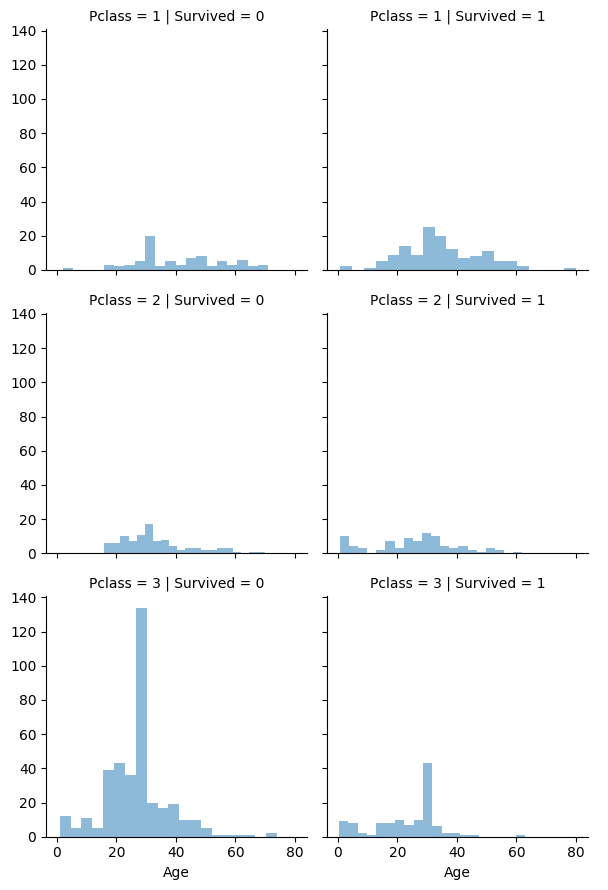

In [22]:
# grid = sns.FacetGrid(train_train_copy, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_copy, col='Survived', row='Pclass', aspect=1)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

<font size=4>These observations could be pivotal for understanding the social dynamics and priorities during the evacuation or rescue operations on the Titanic, reflecting how different age groups and social classes were affected during the disaster.<font>

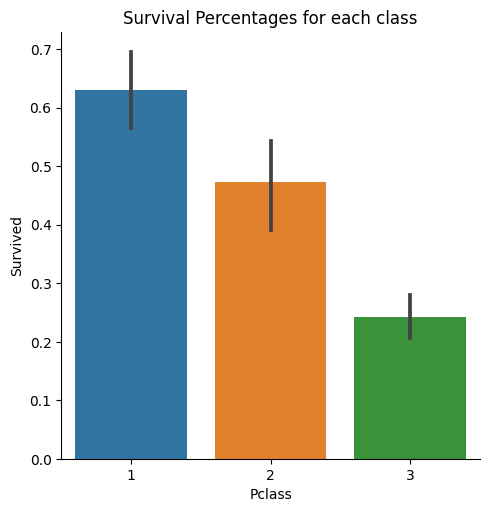

In [23]:
sns.catplot(x='Pclass', y='Survived', data=train_copy, kind="bar")
plt.title("Survival Percentages for each class")
plt.show()

From the graph depicting survival percentages by passenger class on the Titanic:
* First Class (Pclass 1): Approximately 60% survival rate. This indicates that more than half of the passengers in first class survived the disaster.
* Second Class (Pclass 2): Around 45% survival rate. This shows that less than half, but still a significant portion, of the passengers in second class survived.
* Third Class (Pclass 3): Approximately 25% survival rate. This is notably lower, indicating that only a quarter of third class passengers survived.
    
These data points underscore the disparities in survival rates among different passenger classes, reflecting the influence of socio-economic status on survival probabilities during the Titanic disaster.

Distribution of classes


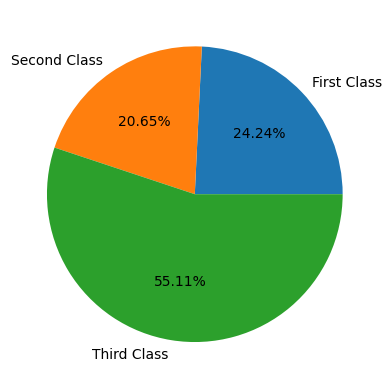

In [24]:
plt.pie(x=train_copy.groupby('Pclass').agg('count')['Survived'], autopct='%1.2f%%', labels=['First Class', 'Second Class','Third Class'])
print("Distribution of classes")
plt.show()

<font size='4'>This highlights the ship's socioeconomic diversity and suggests how class might have impacted the evacuation dynamics, with Third Class passengers likely facing less favorable conditions during the emergency.</font>

<font size='4'>Now, lets see the **survival** rate of all passengers via **Pclass**</font>

Distribution of classes among the survivors


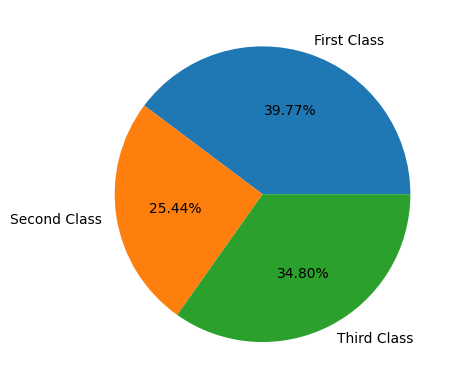

In [25]:
plt.pie(x=train_copy[train_copy.Survived == 1].groupby('Pclass').agg('count')['Survived'], autopct='%1.2f%%', labels=['First Class', 'Second Class','Third Class'])
print("Distribution of classes among the survivors")
plt.show()

This distribution underscores the impact of socioeconomic factors on survival probabilities: 
1) First-class passengers had the highest survival percentage, reflecting possibly preferential treatment or more immediate access to life-saving measures. 
2) Third-class passengers, despite being the largest group on the ship, did not survive in proportion to their numbers, highlighting potential disparities in emergency response and accessibility to lifeboats.

This information is crucial for understanding the social dynamics during the disaster and offers valuable lessons for managing safety and emergency protocols in diverse socio-economic settings.

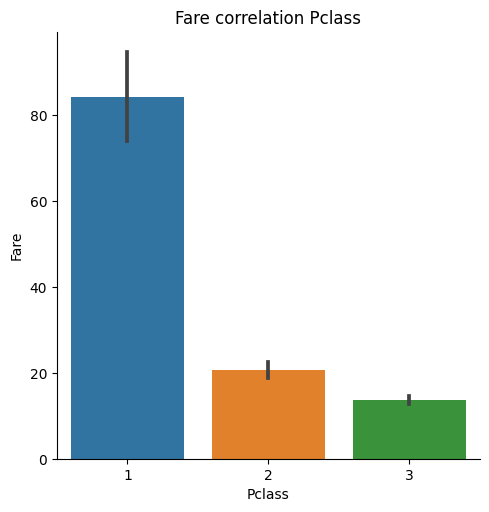

In [26]:
sns.catplot(x='Pclass', y='Fare', data=train_copy, kind="bar")
plt.title("Fare correlation Pclass")
plt.show()

The bar chart illustrates the average fare paid by passengers in each class on the Titanic, clearly showing a strong correlation between fare and passenger class:<br>

1) First Class (Blue Bar): Passengers in First Class paid the highest average fare, substantially more than the other classes. This reflects the luxurious accommodations and amenities available to First Class passengers.<br>

2) Second Class (Orange Bar): The average fare for Second Class is significantly lower than First Class but still notably higher than Third Class. This middle range suggests better conditions than Third Class but without the luxury of First Class.<br>

3) Third Class (Green Bar): The lowest average fare was paid by Third Class passengers, indicating the more basic conditions and facilities provided to this segment.<br>

This visualization provides a straightforward representation of how socioeconomic status, reflected by the fare passengers could afford, influenced their experience aboard the Titanic.</font>

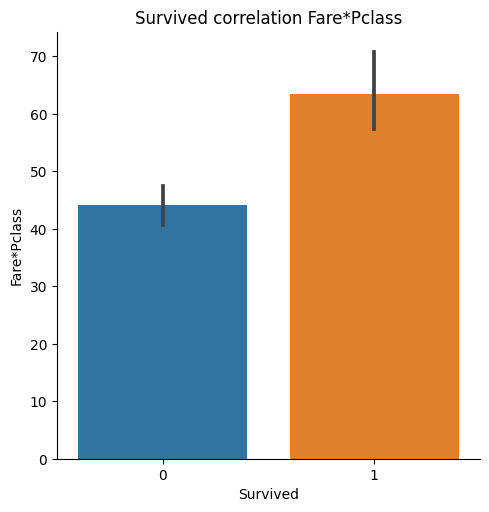

In [27]:
sns.catplot(x='Survived', y='Fare*Pclass', data=train_copy, kind="bar")
plt.title("Survived correlation Fare*Pclass")
plt.show()

<font size='4'>Ssurvivors of the Titanic had higher average values of Fare*Pclass compared to non-survivors. This indicates that passengers who paid more relative to their class were more likely to survive, suggesting a significant role of socio-economic status in survival chances during the disaster. This highlights the impact of economic factors on survival probabilities in critical situations.</font>

In [28]:
# sns.catplot(x='Survived', y='Sex*Pclass', data=train_copy, kind="bar")
# plt.title("Survived correlation Sex*Pclass")
# plt.show()

<font size='4'>Higher values of Sex*Pclass were associated with increased survival rates on the Titanic, indicating that the combination of gender and class significantly influenced survival chances. <br>This underscores the role of social hierarchies and gender norms in determining who survived the disaster.</font>

<font size='5'>**Survived correlation HadFamily**</font>

Distribution of HadFamily among the passengers


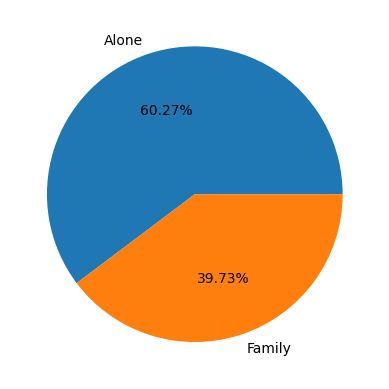

In [29]:
plt.pie(x=train_copy.groupby('HadFamily').agg('count')['Survived'], autopct='%1.2f%%', labels=['Alone','Family'])
print("Distribution of HadFamily among the passengers")
plt.show()

<font size='4'>Most of the people on the Titanic came alone.</font>

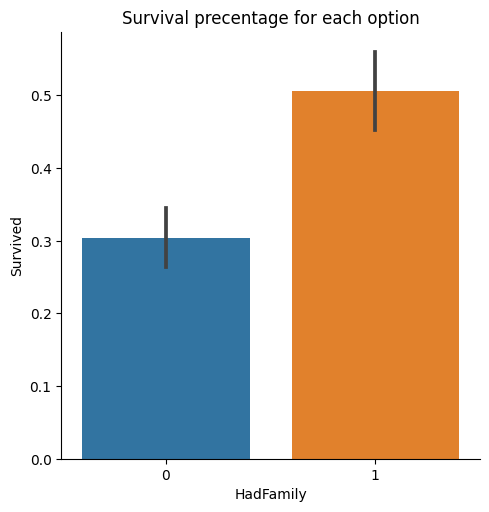

In [30]:
sns.catplot(x='HadFamily', y='Survived', data=train_copy, kind="bar")
plt.title("Survival precentage for each option")
plt.show()

<font size='4'>It can be seen that those who came with a family had a greater chance of surviving</font>

Distribution of family among the survivors


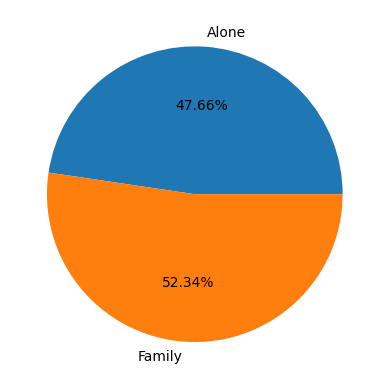

In [31]:
plt.pie(x=train_copy[train_copy.Survived == 1].groupby('HadFamily').agg('count')['Survived'], autopct='%1.2f%%', labels=['Alone','Family'])
print("Distribution of family among the survivors")
plt.show()

<font size='4'>Passengers who had family on board had a higher survival rate compared to those traveling alone. <br>
This indicates that passengers traveling with family members may have had a better chance of survival, possibly due to mutual assistance and support during the evacuation, or prioritization of families during rescue operations.</font>

<font size='5'>**Survived correlation Age**</font>

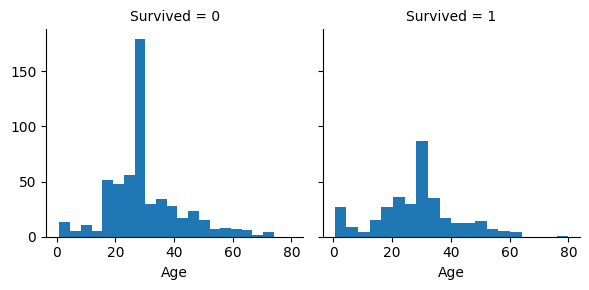

In [32]:
g = sns.FacetGrid(train_copy, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<font size='4'>The histograms of age distributions for Titanic survivors and non-survivors highlight that children had a higher survival rate, likely due to prioritized evacuation policies, while young adults, especially those aged 20 to 30, were more likely to not survive, potentially due to their larger numbers on the ship and lower priority in rescue efforts.</font>

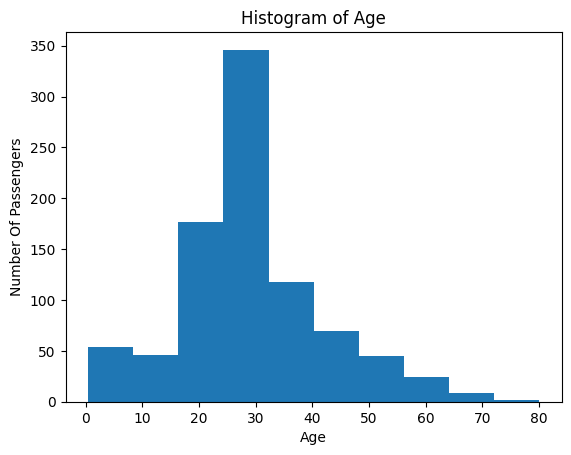

In [33]:
train_copy["Age"].plot(kind='hist', ylabel='Number Of Passengers')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.show()

<font size=4>The histogram shows the age distribution of Titanic passengers, with a prominent peak in the 20 to 30 year age group, indicating that young adults were the largest demographic on board.<br> The number of passengers decreases with age and is notably lower for both children and the elderly. This age profile suggests that the ship primarily carried young adults.</font>

<font size='5'>We can add another feature called AgeCategory</font>

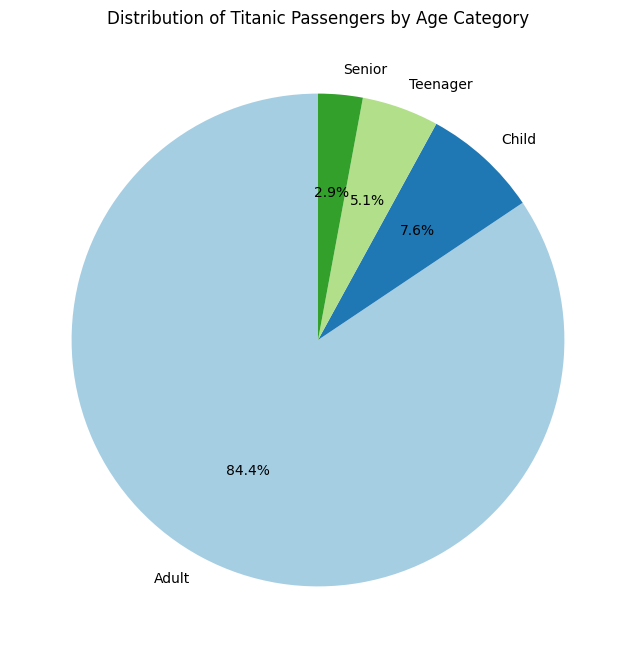

In [34]:
bins = [0, 12, 18, 60, 120]  # Child, Teenager, Adult, Senior
labels = ['Child', 'Teenager', 'Adult', 'Senior']
train_copy['AgeCategory'] = pd.cut(train_copy['Age'], bins=bins, labels=labels, right=False)
df_test['AgeCategory'] = pd.cut(train_copy['Age'], bins=bins, labels=labels, right=False)


# Filter for survivors
survivors = train_copy

# Calculate the number of survivors in each age category
survivor_distribution = survivors['AgeCategory'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(survivor_distribution, labels=survivor_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(survivor_distribution))))
plt.title('Distribution of Titanic Passengers by Age Category')
plt.show()

<font size='4'>We can see that most of the passengers were adults.</font>

<font size='4'>Now, lets see the **survival** rate of all passengers via AgeCategory</font>

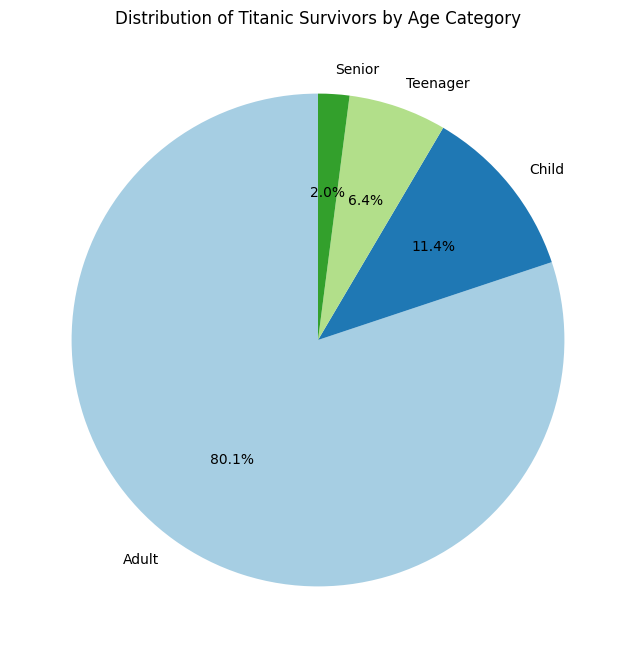

In [35]:
bins = [0, 12, 18, 60, 120]  # Child, Teenager, Adult, Senior
labels = ['Child', 'Teenager', 'Adult', 'Senior']
train_copy['AgeCategory'] = pd.cut(train_copy['Age'], bins=bins, labels=labels, right=False)
df_test['AgeCategory'] = pd.cut(train_copy['Age'], bins=bins, labels=labels, right=False)


# Filter for survivors
survivors = train_copy[train_copy['Survived'] == 1]

# Calculate the number of survivors in each age category
survivor_distribution = survivors['AgeCategory'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(survivor_distribution, labels=survivor_distribution.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(range(len(survivor_distribution))))
plt.title('Distribution of Titanic Survivors by Age Category')
plt.show()

<font size='4'>The pie chart shows the age distribution of Titanic survivors, indicating that the majority, 80.1%, were adults.<br>
This distribution underscores that adults had the highest survival rate, possibly due to greater mobility or resourcefulness during the crisis.</font>

<font size=5>Dropping Age Feature</font><br>
<font size=4>After we added AgeCategory feature, we don't need Age feature anymore so we can drop it.</font>

In [36]:
train_copy = train_copy.drop('Age', axis=1)
df_test = df_test.drop('Age', axis=1)

In [37]:
train_copy[['AgeCategory', 'Survived']].groupby(['AgeCategory'], as_index=False, observed=True).mean().sort_values(by='Survived', ascending=False)

,AgeCategory,Survived
0,Child,0.573529
1,Teenager,0.488889
2,Adult,0.364362
3,Senior,0.269231


<font size='4'>We can see that the survival rate for the young people was higher in relation to the number of people in this group.<br>
Because there weren't a lot of childrens, we can't rely on this data.</font>

<font size='5'>**Survived correlationn Sex**</font>

Distribution of genders


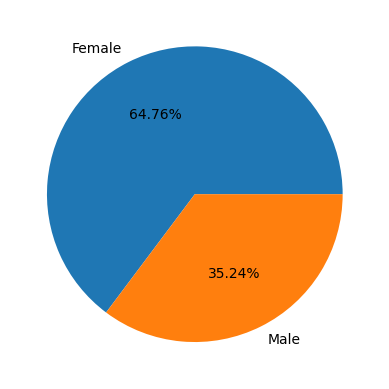

In [38]:
plt.pie(x=train_copy.groupby('Sex').agg('count')['Survived'], autopct='%1.2f%%', labels=['Female', 'Male'])
print("Distribution of genders")
plt.show()

<font size='4'>We can see that most of the passengers were females.</font>

Distribution of genders among the survivors


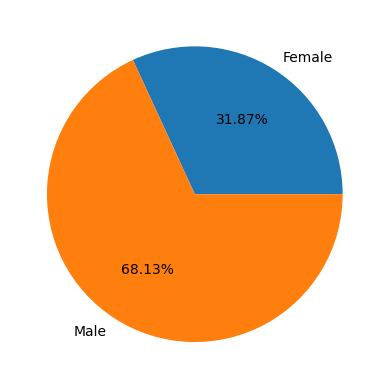

In [39]:
plt.pie(x=train_copy[train_copy.Survived == 1].groupby('Sex').agg('count')['Survived'], autopct='%1.2f%%', labels=['Female', 'Male'])
print("Distribution of genders among the survivors")
plt.show()

In [40]:
train_copy['Sex'].replace({1: 'Female', 0: 'Male'})
train_copy[['Sex', 'Survived']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


<font size='4'>The data indicates that gender played a crucial role in determining the likelihood of survival on the Titanic, with women being significantly more likely to survive than men.</font>

In [41]:
train_copy.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,HadFamily,Fare*Pclass,Pclass+Fare,Age*Pclass,Age*Fare,AgeCategory
0,0,3,0,7.2500,2,1,1,21.7500,10.2500,66.0,159.5000,Adult
1,1,1,1,71.2833,0,3,1,71.2833,72.2833,38.0,2708.7654,Adult
2,1,3,1,7.9250,2,2,0,23.7750,10.9250,78.0,206.0500,Adult
3,1,1,1,53.1000,2,3,1,53.1000,54.1000,35.0,1858.5000,Adult
4,0,3,0,8.0500,2,1,0,24.1500,11.0500,105.0,281.7500,Adult


In [42]:
# sns.catplot(x='Survived', y='Sex*Fare', data=train_copy, kind="bar")
# plt.title("Survived correlation Sex*Fare")
# plt.show()

<font size='4'>The chance of survival increased with a stronger correlation between Sex and Pclass.<br></font>

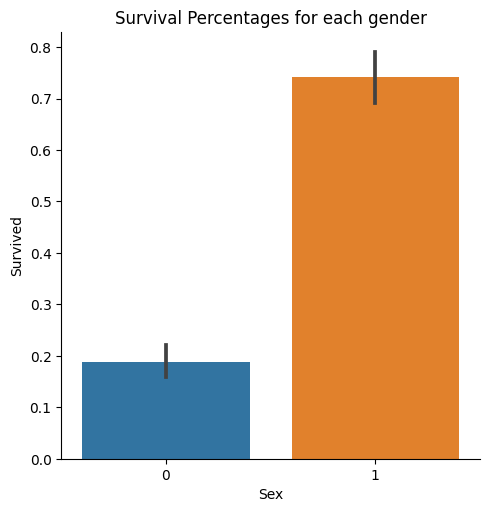

In [43]:
sns.catplot(x='Sex', y='Survived', data=train_copy, kind="bar")
plt.title("Survival Percentages for each gender")
plt.show()

<font size="4">The data reveals that while the majority of the passengers were male, only about 20% of them survived.<br>
    In contrast, females comprised only 35% of the passengers, yet over 70% of them survived.<br>
    This indicates that females had a significantly higher chance of survival.</font>

<font size='5'>**Survived correlationn Embarked**</font>

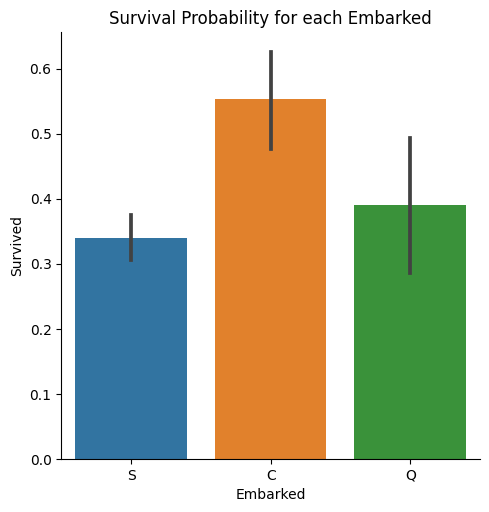

In [44]:
embarked_copy = train_copy['Embarked'].replace({0: 'C', 1: 'Q', 2: 'S'})

# Create a temporary DataFrame for plotting
plot_data = train_copy.copy()
plot_data['Embarked'] = embarked_copy

# Plot the graph with updated labels
sns.catplot(x='Embarked', y='Survived', data=plot_data, kind='bar')
plt.title("Survival Probability for each Embarked")
plt.show()

<font size=4>Passengers who embarked at Cherbourg (C) had the highest survival probability, followed by those who embarked at Queenstown (Q), with passengers from Southampton (S) having the lowest survival probability. This suggests that embarkation port played a role in survival rates, potentially due to differences in the socio-economic status of passengers or the location of cabins relative to lifeboats.</font>

Distribution of Embarked


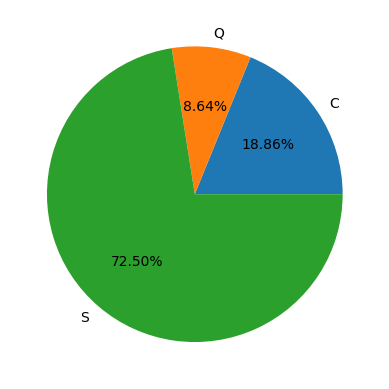

In [45]:
plt.pie(x=train_copy.groupby('Embarked').agg('count')['Survived'], autopct='%1.2f%%', labels=['C', 'Q', 'S'])
print("Distribution of Embarked")
plt.show()

<font size=4>The pie chart shows the distribution of all Titanic passengers based on their embarkation ports. <br>
This distribution indicates that the majority of passengers started their journey from Southampton, reflecting its significance as the primary departure port for the Titanic. Comparing this with the distribution of survivors can provide insights into how embarkation location influenced survival rates.</font>

<font size='4'>Now, lets see the **survival** rate of all passengers via Embarked</font>

Distribution of Embarked among the survivals


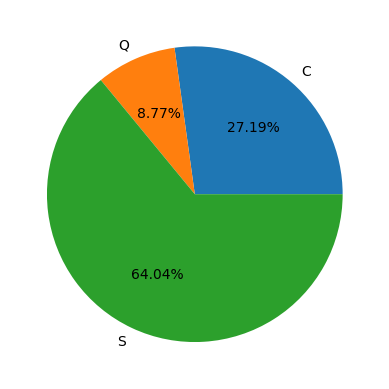

In [46]:
plt.pie(x=train_copy[train_copy.Survived == 1].groupby('Embarked').agg('count')['Survived'], autopct='%1.2f%%', labels=['C', 'Q', 'S'])
print("Distribution of Embarked among the survivals")
plt.show()

<font size=4>The pie chart illustrates the distribution of Titanic survivors based on their embarkation ports. It shows that the majority of survivors embarked from Southampton (S) at 64.04%.<br>
This distribution reflects the higher number of passengers who initially boarded at Southampton, as it was the ship's primary departure port, compared to the other ports.</font>

<font size='5'>Lets change new feature AgeCategory to be numric</font>

In [47]:
for dataset in train_copy, df_test:
    dataset['AgeCategory'] = dataset['AgeCategory'].map( {'Child': 0, 'Teenager': 1, 'Adult': 2, 'Senior': 3} ).astype(int)

train_copy.head()

,Survived,Pclass,Sex,Fare,Embarked,Title,HadFamily,Fare*Pclass,Pclass+Fare,Age*Pclass,Age*Fare,AgeCategory
0,0,3,0,7.2500,2,1,1,21.7500,10.2500,66.0,159.5000,2
1,1,1,1,71.2833,0,3,1,71.2833,72.2833,38.0,2708.7654,2
2,1,3,1,7.9250,2,2,0,23.7750,10.9250,78.0,206.0500,2
3,1,1,1,53.1000,2,3,1,53.1000,54.1000,35.0,1858.5000,2
4,0,3,0,8.0500,2,1,0,24.1500,11.0500,105.0,281.7500,2


<font size='5'>**In conclusing, our new data with all new features will look like:**</font>

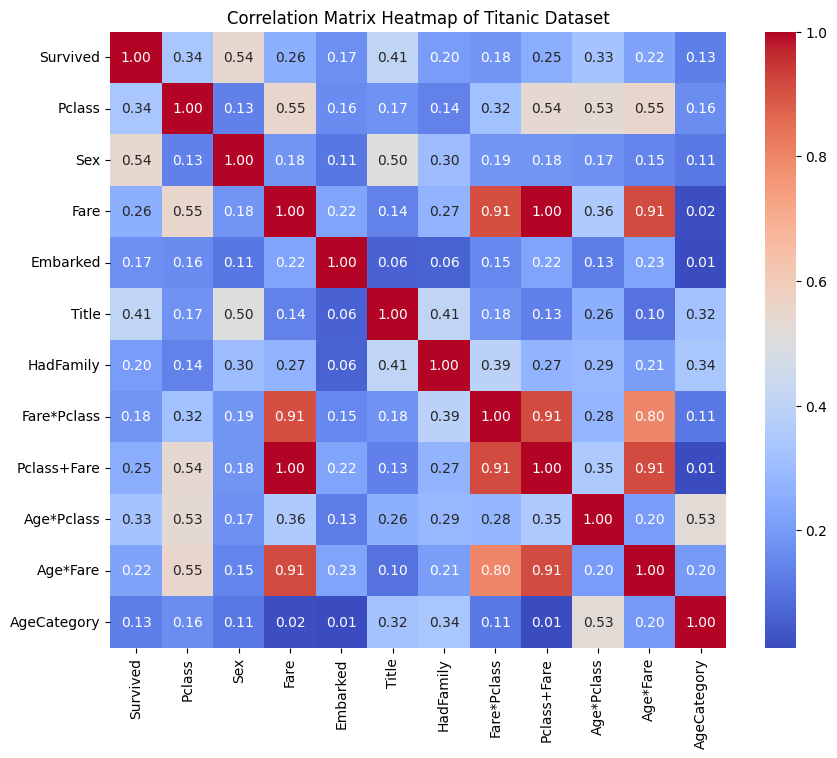

In [48]:
numerical_train_copy = train_copy.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numerical columns only
correlation_matrix = np.abs(numerical_train_copy.corr())

# Create a heatmap from the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap of Titanic Dataset')
plt.show()

<font size=4>The heatmap highlights that gender, class, and social status are the most influential factors in determining survival on the Titanic. Females and passengers from higher classes with higher social titles had better survival rates. Economic status, as reflected by fare, also played a significant role. Age and embarkation port had minimal impact on survival probabilities.</font>

<font size='5'>**Train - Test Split**</font><br>
<font size='4'>We are starting to understand more about our data, and about the correlations between the features. <br>
Now we can create train and test groups for our models.</font>

In [49]:
t = train_copy['Survived'].copy()
X = train_copy.drop(['Survived'], axis=1)

In [50]:
def print_graphs_accuracy_logloss(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'acc' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'acc' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=list(v.keys()), y=list(v.values()), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

In [51]:
from sklearn.metrics import accuracy_score, log_loss  # Make sure this line is included

# plot the score by split and the loss by split
def plot_score_and_loss_by_split(X, t):
    graph_points = {
        'train_acc': {},
        'val_acc': {},
        'train_logloss': {},
        'val_logloss': {}
    }

    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(
            X, t, test_size=size/100, random_state=42)
        classifier = linear_model.SGDClassifier(loss='log_loss', random_state=42)  # Using log loss for probabilistic outputs
        classifier.fit(X_train, t_train)
        t_train_pred = classifier.predict(X_train)
        t_val_pred = classifier.predict(X_val)
        t_train_prob = classifier.predict_proba(X_train)
        t_val_prob = classifier.predict_proba(X_val)

        graph_points['train_acc'][size/100] = accuracy_score(t_train, t_train_pred)
        graph_points['val_acc'][size/100] = accuracy_score(t_val, t_val_pred)
        graph_points['train_logloss'][size/100] = log_loss(t_train, t_train_prob)
        graph_points['val_logloss'][size/100] = log_loss(t_val, t_val_prob)

    print_graphs_accuracy_logloss(graph_points)

plot_score_and_loss_by_split(X, t)

<font size='4'>**Linear Regression Model using Normal Equation**</font>

In [52]:
X_train, X_test, t_train, t_test =sklearn.model_selection.train_test_split(X, t,
                                                                           test_size=0.3,
                                                                           random_state=42)

<font size=5>**Check for the best model**</font><br>
<font size=4>We aim to identify the best model by dropping features with the lowest correlation to survival. Our goal is to achieve the highest average score across both training and testing datasets.</font>

In [53]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))
SGD_cls.fit(X_train, t_train)
y_train_prob = SGD_cls.predict_proba(X_train)
y_test_prob = SGD_cls.predict_proba(X_test)

y_train = SGD_cls.predict(X_train)
y_test = SGD_cls.predict(X_test)

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train, t_train))
print('Accuracy score on test', SGD_cls.score(X_test, t_test))
SGD_avg = (SGD_cls.score(X_train, t_train) + SGD_cls.score(X_test, t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8170144462279294
Accuracy score on test 0.7910447761194029
Accuracy avg score 0.8040296111736662

CE on train 0.4438582652305368
CE on test 0.4321017218318933


In [54]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))
SGD_cls.fit(X_train.drop(['HadFamily'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['HadFamily'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['HadFamily',], axis=1))

y_train = SGD_cls.predict(X_train.drop(['HadFamily'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['HadFamily'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['HadFamily'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['HadFamily'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['HadFamily'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['HadFamily'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8202247191011236
Accuracy score on test 0.7985074626865671
Accuracy avg score 0.8093660908938454

CE on train 0.4446302307592339
CE on test 0.4325310337100058


In [55]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))
SGD_cls.fit(X_train.drop(['AgeCategory'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['AgeCategory'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['AgeCategory',], axis=1))

y_train = SGD_cls.predict(X_train.drop(['AgeCategory'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['AgeCategory'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['AgeCategory'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['AgeCategory'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['AgeCategory'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['AgeCategory'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8073836276083467
Accuracy score on test 0.7873134328358209
Accuracy avg score 0.7973485302220837

CE on train 0.4444824637431376
CE on test 0.4308265193429655


In [56]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))
SGD_cls.fit(X_train.drop(['Embarked'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['Embarked'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['Embarked',], axis=1))

y_train = SGD_cls.predict(X_train.drop(['Embarked'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['Embarked'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['Embarked'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['Embarked'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['Embarked'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['Embarked'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8154093097913323
Accuracy score on test 0.8059701492537313
Accuracy avg score 0.8106897295225318

CE on train 0.4477244611863639
CE on test 0.4268817679168921


In [57]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))

SGD_cls.fit(X_train.drop(['HadFamily', 'Embarked'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['HadFamily', 'Embarked'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['HadFamily', 'Embarked'], axis=1))

y_train = SGD_cls.predict(X_train.drop(['HadFamily', 'Embarked'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['HadFamily', 'Embarked'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['HadFamily', 'Embarked'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['HadFamily', 'Embarked'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['HadFamily', 'Embarked'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['HadFamily', 'Embarked'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8105939004815409
Accuracy score on test 0.7947761194029851
Accuracy avg score 0.802685009942263

CE on train 0.4511106168138048
CE on test 0.42838052571331764


In [58]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))

SGD_cls.fit(X_train.drop(['HadFamily', 'Fare*Pclass'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['HadFamily', 'Fare*Pclass'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['HadFamily', 'Fare*Pclass'], axis=1))

y_train = SGD_cls.predict(X_train.drop(['HadFamily', 'Fare*Pclass'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['HadFamily', 'Fare*Pclass'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['HadFamily', 'Fare*Pclass'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['HadFamily', 'Fare*Pclass'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['HadFamily', 'Fare*Pclass'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['HadFamily', 'Fare*Pclass'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8089887640449438
Accuracy score on test 0.8059701492537313
Accuracy avg score 0.8074794566493375

CE on train 0.4494755603259634
CE on test 0.4344779989203518


In [59]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))

SGD_cls.fit(X_train.drop(['AgeCategory', 'Fare*Pclass'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['AgeCategory', 'Fare*Pclass'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['AgeCategory', 'Fare*Pclass'], axis=1))

y_train = SGD_cls.predict(X_train.drop(['AgeCategory', 'Fare*Pclass'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['AgeCategory', 'Fare*Pclass'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['AgeCategory', 'Fare*Pclass'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['AgeCategory', 'Fare*Pclass'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['AgeCategory', 'Fare*Pclass'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['AgeCategory', 'Fare*Pclass'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8073836276083467
Accuracy score on test 0.8059701492537313
Accuracy avg score 0.806676888431039

CE on train 0.4461296420008441
CE on test 0.43142515702671036


In [60]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))

SGD_cls.fit(X_train.drop(['HadFamily', 'AgeCategory'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['HadFamily', 'AgeCategory'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['HadFamily', 'AgeCategory'], axis=1))

y_train = SGD_cls.predict(X_train.drop(['HadFamily', 'AgeCategory'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['HadFamily', 'AgeCategory'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['HadFamily', 'AgeCategory'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['HadFamily', 'AgeCategory'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['HadFamily', 'AgeCategory'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['HadFamily', 'AgeCategory'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8218298555377207
Accuracy score on test 0.7947761194029851
Accuracy avg score 0.8083029874703529

CE on train 0.4474191712332317
CE on test 0.43125421763656946


In [61]:
# create the SGDClassifier and predict the probabilities of the train and test data
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))

SGD_cls.fit(X_train.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1), t_train)
y_train_prob = SGD_cls.predict_proba(X_train.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1))
y_test_prob = SGD_cls.predict_proba(X_test.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1))

y_train = SGD_cls.predict(X_train.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1))
y_test = SGD_cls.predict(X_test.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1))

# print the accuracy score and CE loss of the train and test
print('Accuracy score on train', SGD_cls.score(X_train.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1), t_train))
print('Accuracy score on test', SGD_cls.score(X_test.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1), t_test))
SGD_avg = (SGD_cls.score(X_train.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1), t_train) + 
           SGD_cls.score(X_test.drop(['HadFamily', 'AgeCategory', 'Embarked'], axis=1), t_test))/2
print('Accuracy avg score', SGD_avg)
print()
print('CE on train', metrics.log_loss(t_train, y_train_prob))
print('CE on test', metrics.log_loss(t_test, y_test_prob))

Accuracy score on train 0.8089887640449438
Accuracy score on test 0.7947761194029851
Accuracy avg score 0.8018824417239645

CE on train 0.4512872705429626
CE on test 0.4264428764087203


<font size=5>**Conclusion from models**<br>
<font size=4>We can see that we get the best avg score when we are using the model without HadFamily feature.</font> 

In [62]:
X = X.drop(['HadFamily'], axis=1)
df_test = df_test.drop(['HadFamily'], axis=1)

In [63]:
np.where(df_test.isnull())

(array([], dtype=int64), array([], dtype=int64))

In [64]:
df_test.head()

,Pclass,Sex,Fare,Embarked,Title,Fare*Pclass,Pclass+Fare,Age*Pclass,Age*Fare,AgeCategory
0,3,0,7.8292,1,1,23.4876,10.8292,103.5,270.1074,2
1,3,1,7.0000,2,3,21.0000,10.0000,141.0,329.0000,2
2,2,0,9.6875,1,1,19.3750,11.6875,124.0,600.6250,2
3,3,0,8.6625,2,1,25.9875,11.6625,81.0,233.8875,2
4,3,1,12.2875,2,3,36.8625,15.2875,66.0,270.3250,2


In [65]:
SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log_loss', alpha=0, learning_rate='constant', eta0=0.01))
SGD_cls.fit(X,t)
submission_preds = SGD_cls.predict(df_test)

In [66]:
submission = pd.DataFrame({"PassengerId": test_ids.values, "Survived": submission_preds})

In [67]:
submission.to_csv("submission.csv", index=False)

<font size=6>**Summary**</font><br>
<font size=4>After investigating the data, we identified and dropped unnecessary features, filled in missing values, and added new relevant features. <br>We analyzed the data to uncover patterns and insights about the survivors. Following this, we tested various models to determine the most effective one. Ultimately, we selected the SGDClassifier model as the best-performing model and used it to create our final submission.<br>
<br>
During the process, we discovered features that significantly enhanced our model's accuracy. Our approach was inspired by several influential notebooks and visualizations that guided our feature engineering and modeling efforts.<br>
<br>
In the end, we successfully developed a robust model using SGDClassifier, which we believe is well-suited for making accurate predictions based on the patterns we identified in the data.</font>

<font size=6>**References**</font><br>

<font size=4>[Titanic tutorial - ALEXIS COOK](https://www.kaggle.com/code/alexisbcook/titanic-tutorial)<br>
[Machine Learning with the Titanic Dataset - Medium](https://towardsdatascience.com/machine-learning-with-the-titanic-dataset-7f6909e58280)<br>
[How to do the Titanic Kaggle Competition - YouTube](https://www.youtube.com/watch?v=pUSi5xexT4Q&t=958s)<br>
[Beginner Kaggle Data Science Project Walk-Through (Titanic) - YouTube](https://www.youtube.com/watch?v=I3FBJdiExcg)<br>
[PRASHANTTZ's Notebook - GitHub](https://github.com/PRASHANTTZ/Titanic-Machine-Learning-from-Disaster/blob/master/TitanicPrediction.ipynb)<br>
</font>
